In [1]:
import numpy as np
import operator
# from numpy.linalg import norm
from numpy.linalg import inv
from numpy.linalg import det
import math
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')
import time
import scipy as sp
import scipy.special
import scipy.misc
import scipy.integrate
import functools

norm = lambda A: np.linalg.norm(A, ord=2)

### Метод Ритца

In [2]:
@functools.lru_cache(maxsize=None)
def coord(i):
    # координатные функции
    return lambda x: (1 - x**2) * sp.special.eval_jacobi(i, 1, 1, x)

In [3]:
def L2_dot_prod(x, y):
    # скалярное произведение в L2
    f = lambda z: y(z) * x(z)
    return sp.integrate.quad(f, -1, 1)[0]

In [4]:
@functools.lru_cache(maxsize=None)
def bi_form(y, z, p, r):
    # билинейная форма (Ly, z) для [w_i, w_j] = a_ij
    y_ = lambda x: sp.misc.derivative(y, x, dx=1e-6)
    z_ = lambda x: sp.misc.derivative(z, x, dx=1e-6)
    f  = lambda x: p(x) * y_(x) * z_(x) + r(x) * y(x) * z(x) 
    return sp.integrate.quad(f, -1, 1)[0]

In [5]:
def ritz(p, r, f, n, special_func):
    # метод Ритца
    w = special_func + [coord(i) for i in range(n)]
    A = np.array([[bi_form(w[i], w[j], p, r) for i in range(n)] for j in range(n)])
    b = np.array([L2_dot_prod(f, w[i]) for i in range(n)])
    
    c = np.linalg.solve(A, b)

    return lambda x: sum([c[i] * w[i](x) for i in range(n)])

In [6]:
def draw(p, r, f, special_func=[], N=1):
    # два рисунка
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80)
    for n in range(1, N + 1):
        R = ritz(p, r, f, n, special_func)
        nodes = np.linspace(-1, 1, 100)

        ax[0].plot(nodes, list(map(R, nodes)))

    R = ritz(p, r, f, n, special_func)
    nodes = np.linspace(-1, 1, 100)
    ax[1].plot(nodes, list(map(R, nodes)))

In [7]:
def draw2(p, r, f, special_func=[], N=1):
    # множество рисунков
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), dpi=80)
    for n in range(1, N + 1):
        R = ritz(p, r, f, n, special_func)
        nodes = np.linspace(-1, 1, 100)

        ax[(n - 1) // 5][(n - 1) % 5].plot(nodes, list(map(R, nodes)))

***
#### Тесты

CPU times: user 389 ms, sys: 751 µs, total: 390 ms
Wall time: 399 ms


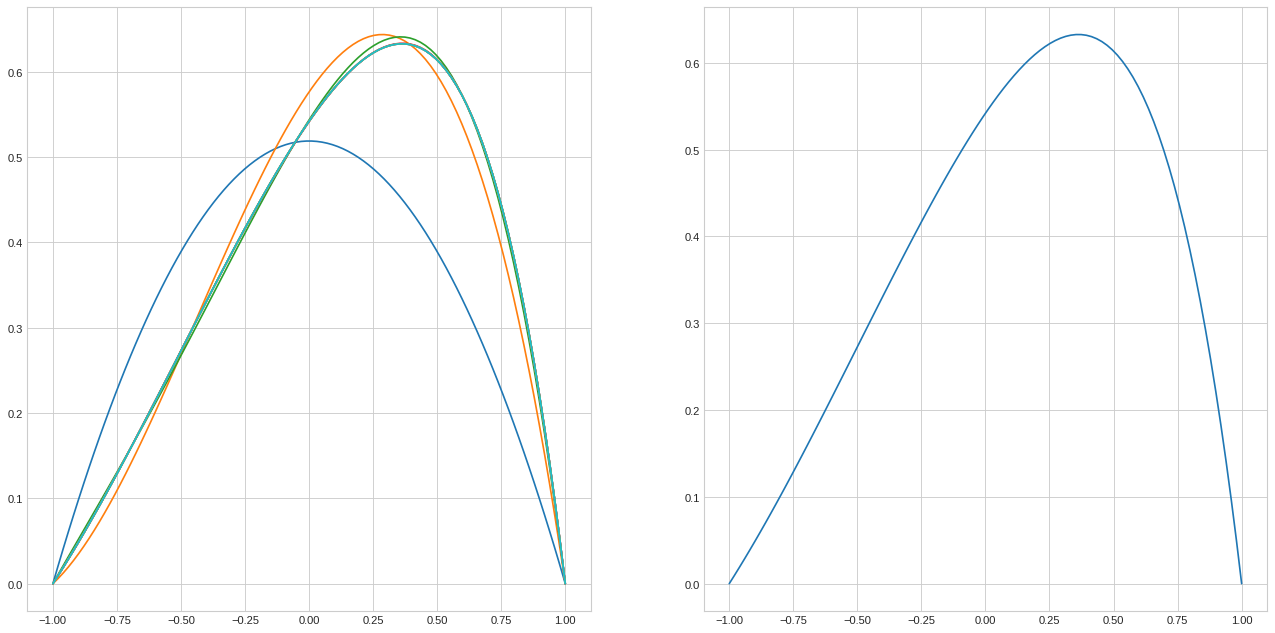

In [8]:
%%time
# Вариант 1
p = lambda x: 1 / (2 + x)
r = lambda x: np.cos(x)
f = lambda x: 1 + x
# u(-1) = u(1) = 0

draw(p, r, f, N=10)
# draw2(p, r, f, N=20)


CPU times: user 191 ms, sys: 494 µs, total: 191 ms
Wall time: 194 ms


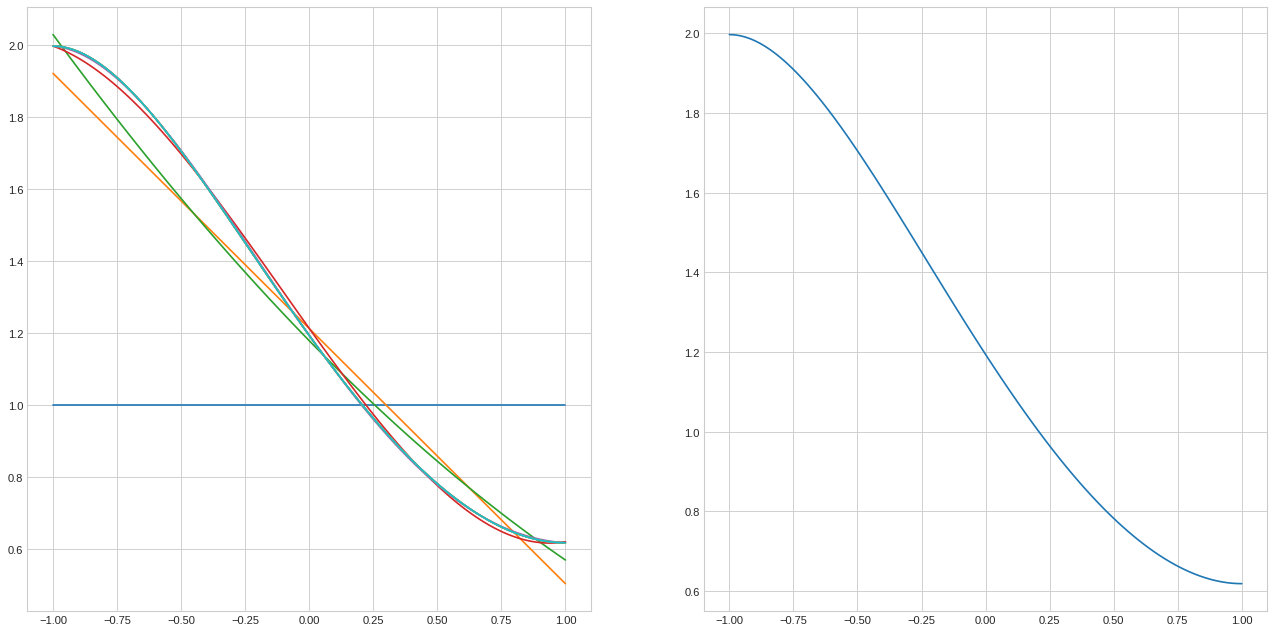

In [9]:
%%time
# Вариант 2
p = lambda x: (2 + x) / (3 + x)
r = lambda x: 1 + np.sin(x)
f = lambda x: 1 - x
# u'(-1) = u'(1) + u(1) = 0

special_func = [lambda x: 1, lambda x: x]

draw(p, r, f, N=10, special_func=special_func)
# draw2(p, r, f, N=20, special_func=special_func)


CPU times: user 400 ms, sys: 6.96 ms, total: 407 ms
Wall time: 408 ms


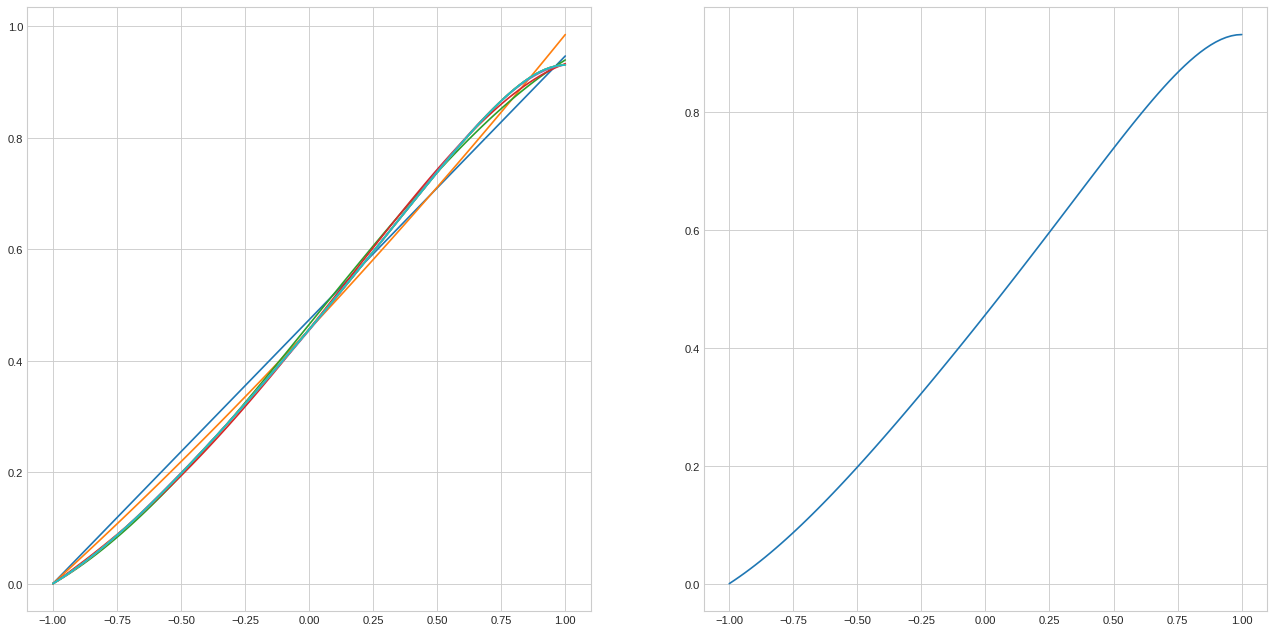

In [10]:
%%time
# Вариант 13
p = lambda x: 1 / (2 * x + 3) 
r = lambda x: (1 + np.cos(x))
f = lambda x: 1 + x
# u(-1) = u'(1) = 0

special_func = [lambda x: 1 + x]

draw(p, r, f, N=10, special_func=special_func)
# draw2(p, r, f, N=20, special_func=special_func)

CPU times: user 242 ms, sys: 7.38 ms, total: 250 ms
Wall time: 249 ms


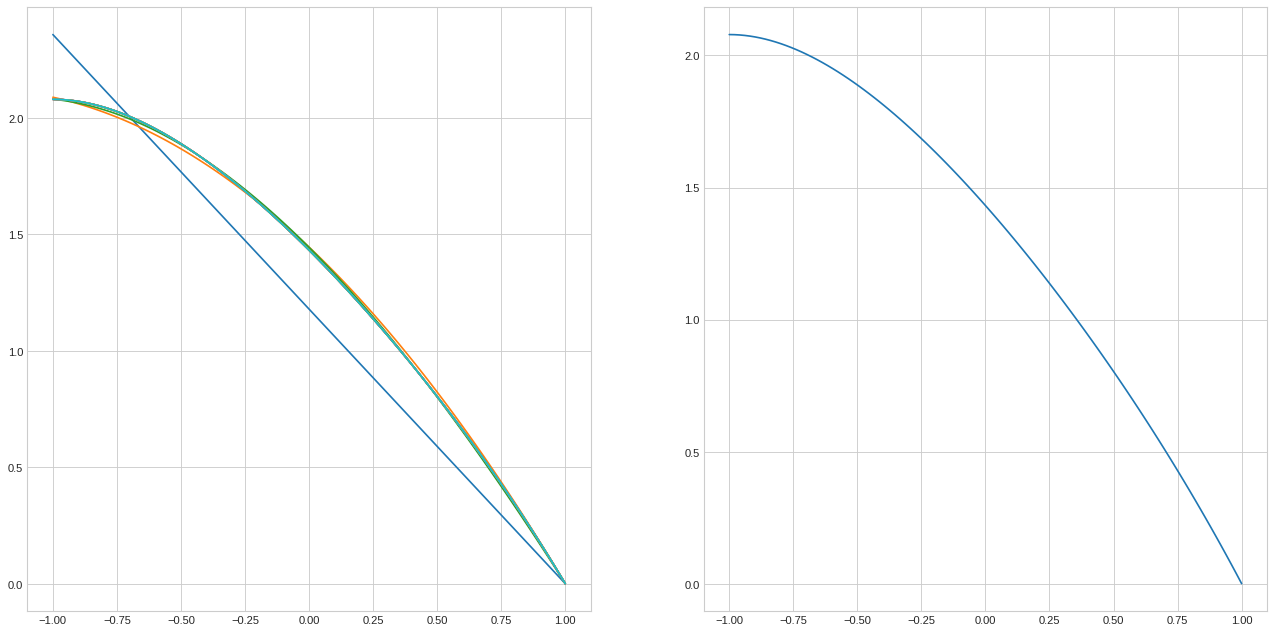

In [11]:
%%time
# Вариант 15
p = lambda x: (x + 4) / (x + 5)
r = lambda x: np.exp(x / 4)
f = lambda x: 2 - x
# u'(-1) = u(1) = 0

special_func = [lambda x: 1 - x]

draw(p, r, f, N=10, special_func=special_func)
# draw2(p, r, f, N=20, special_func=special_func)

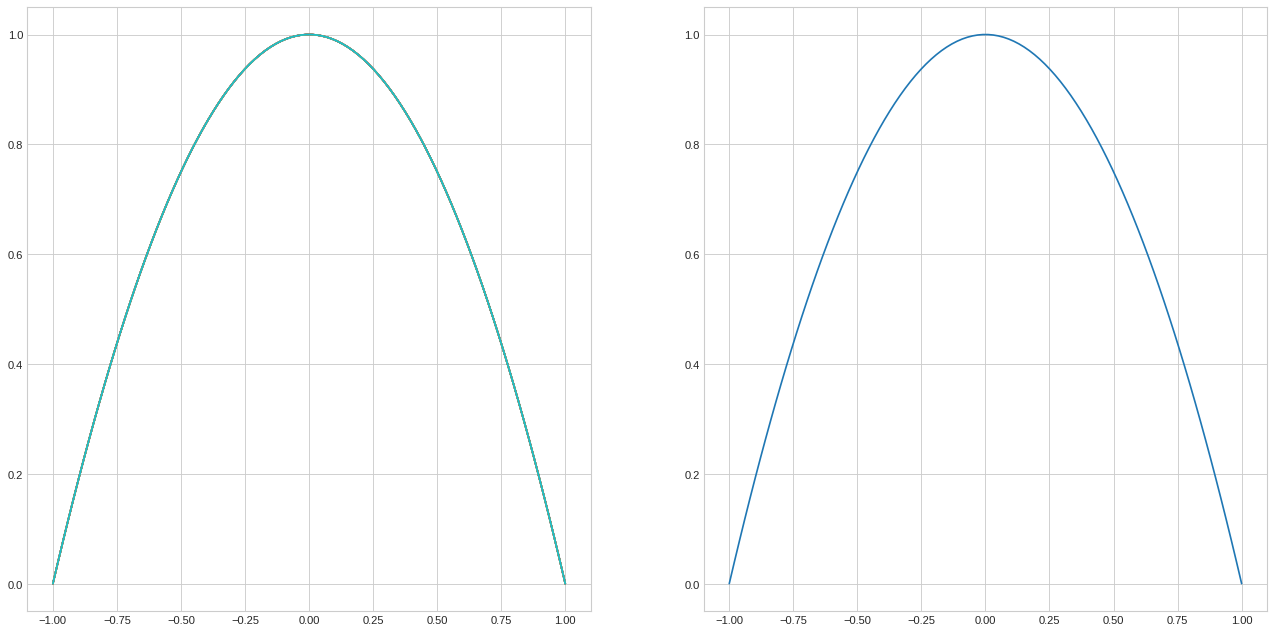

In [12]:
p = lambda x: 1
r = lambda x: 1
f = lambda x: 3 - x**2

draw(p, r, f, N=10)
# draw2(p, r, f, N=20)

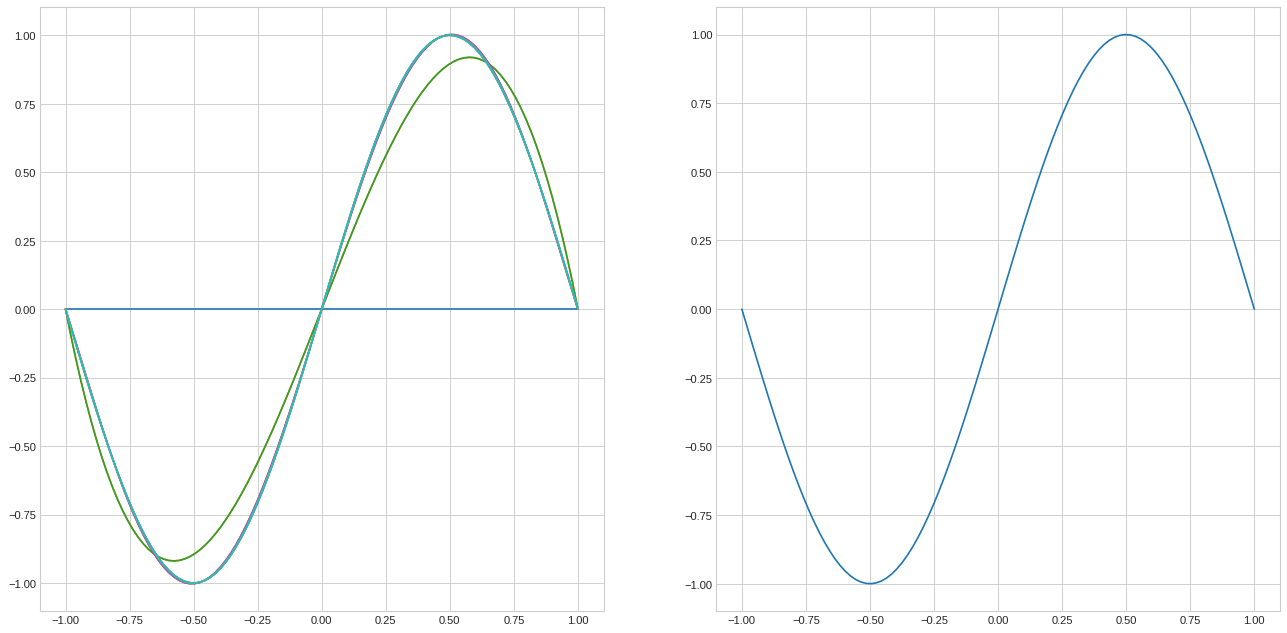

In [13]:
p = lambda x: 123
r = lambda x: 10
f = lambda x: 123 * np.sin(x * np.pi) * np.pi**2 + 10 * np.sin(x * np.pi)

# u = sin(x * pi)

draw(p, r, f, N=10)
# draw2(p, r, f, N=20)